## Minimal example with TensorFlow 2.0
### Actual TensorFlow Intro
In this notebook we will recreate our machine learning algorithm using TF 2.1
### Import the relevant libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

### Data generation

In [4]:
observations = 1000

xs = np.random.uniform(-10,10,size=(observations,1))
zs = np.random.uniform(-10,10,(observations,1))
generated_inputs = np.column_stack((xs,zs))

noise = np.random.uniform(-1,1,(observations,1))
generated_targets = 2*xs - 3*zs + 5 + noise

np.savez('TF_intro', inputs=generated_inputs, targets=generated_targets)

### Solving with TensorFlow

In [5]:
training_data = np.load('TF_intro.npz')

In [55]:
input_size = 2
output_size = 1

model = tf.keras.Sequential([
    tf.keras.layers.Dense(output_size,
                         kernel_initializer=tf.random_uniform_initializer(minval=-0.1,maxval=0.1),
                         bias_initializer=tf.random_uniform_initializer(minval=-0.1,maxval=0.1)
                         )
])

custom_optimizer = tf.keras.optimizers.SGD(learning_rate=0.02)

model.compile(optimizer=custom_optimizer, loss='mean_squared_error')
model.fit(training_data['inputs'], training_data['targets'], epochs=100, verbose = 2)

Train on 1000 samples
Epoch 1/100
1000/1000 - 0s - loss: 19.5394
Epoch 2/100
1000/1000 - 0s - loss: 1.1181
Epoch 3/100
1000/1000 - 0s - loss: 0.4632
Epoch 4/100
1000/1000 - 0s - loss: 0.4028
Epoch 5/100
1000/1000 - 0s - loss: 0.3842
Epoch 6/100
1000/1000 - 0s - loss: 0.4101
Epoch 7/100
1000/1000 - 0s - loss: 0.3680
Epoch 8/100
1000/1000 - 0s - loss: 0.3787
Epoch 9/100
1000/1000 - 0s - loss: 0.3841
Epoch 10/100
1000/1000 - 0s - loss: 0.3579
Epoch 11/100
1000/1000 - 0s - loss: 0.4079
Epoch 12/100
1000/1000 - 0s - loss: 0.4129
Epoch 13/100
1000/1000 - 0s - loss: 0.3839
Epoch 14/100
1000/1000 - 0s - loss: 0.3687
Epoch 15/100
1000/1000 - 0s - loss: 0.3837
Epoch 16/100
1000/1000 - 0s - loss: 0.3852
Epoch 17/100
1000/1000 - 0s - loss: 0.4059
Epoch 18/100
1000/1000 - 0s - loss: 0.3813
Epoch 19/100
1000/1000 - 0s - loss: 0.3848
Epoch 20/100
1000/1000 - 0s - loss: 0.3760
Epoch 21/100
1000/1000 - 0s - loss: 0.3563
Epoch 22/100
1000/1000 - 0s - loss: 0.3647
Epoch 23/100
1000/1000 - 0s - loss: 0.38

### Extract the weights and bias

In [56]:
model.layers[0].get_weights()

[array([[ 2.007609 ],
        [-2.9818418]], dtype=float32),
 array([5.000417], dtype=float32)]

In [57]:
model.layers[0].get_weights()[0]

array([[ 2.007609 ],
       [-2.9818418]], dtype=float32)

In [58]:
model.layers[0].get_weights()[1]

array([5.000417], dtype=float32)

### Extract the outputs (make predictions)

In [59]:
predict = model.predict_on_batch(training_data['inputs'])
predict

<tf.Tensor: shape=(1000, 1), dtype=float32, numpy=
array([[  1.9303775 ],
       [  4.600654  ],
       [ 10.827471  ],
       [ 10.320133  ],
       [ 11.73983   ],
       [-20.430862  ],
       [-25.741594  ],
       [ 41.553066  ],
       [ 34.328766  ],
       [ 47.96192   ],
       [ 35.49413   ],
       [-27.369638  ],
       [ 17.25329   ],
       [-20.080448  ],
       [ 27.735367  ],
       [ 14.26659   ],
       [ -4.0880656 ],
       [  8.023764  ],
       [  5.0509195 ],
       [  6.7867723 ],
       [ 29.291504  ],
       [  5.715289  ],
       [  4.9108596 ],
       [  6.1177278 ],
       [ 21.376398  ],
       [ 34.058926  ],
       [ 43.490177  ],
       [ -7.418258  ],
       [ 13.118937  ],
       [-10.502821  ],
       [ 24.05739   ],
       [ -7.435185  ],
       [ 33.046543  ],
       [ 25.753096  ],
       [-11.248581  ],
       [-12.408468  ],
       [ 28.622843  ],
       [ 42.44628   ],
       [ -4.334723  ],
       [-12.102015  ],
       [ 36.851994  ],
      

In [60]:
targets = training_data['targets']
targets

array([[ 1.32817613e+00],
       [ 5.61467422e+00],
       [ 1.03159362e+01],
       [ 1.02784375e+01],
       [ 1.08623664e+01],
       [-2.00728768e+01],
       [-2.59936733e+01],
       [ 4.12531278e+01],
       [ 3.37327638e+01],
       [ 4.78463936e+01],
       [ 3.51666183e+01],
       [-2.65738895e+01],
       [ 1.68078549e+01],
       [-2.03958869e+01],
       [ 2.77634889e+01],
       [ 1.40015689e+01],
       [-4.87772084e+00],
       [ 7.04226441e+00],
       [ 4.11172850e+00],
       [ 7.40452877e+00],
       [ 2.95975748e+01],
       [ 6.76413105e+00],
       [ 4.11273913e+00],
       [ 6.52780726e+00],
       [ 2.11206993e+01],
       [ 3.33601354e+01],
       [ 4.36800891e+01],
       [-7.94283549e+00],
       [ 1.31963558e+01],
       [-1.05670017e+01],
       [ 2.43877851e+01],
       [-7.32199396e+00],
       [ 3.22540015e+01],
       [ 2.67346465e+01],
       [-1.20014660e+01],
       [-1.30519238e+01],
       [ 2.85701510e+01],
       [ 4.18149080e+01],
       [-4.2

### Plotting the data

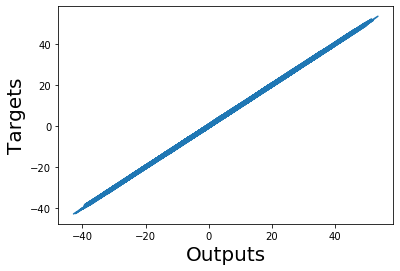

In [61]:
plt.plot(np.squeeze(predict), np.squeeze(targets))
plt.xlabel('Outputs', fontsize=20)
plt.ylabel('Targets', fontsize=20)
plt.show()